In [14]:
import fastf1
import os
import pandas as pd
from tqdm import tqdm

In [15]:
fastf1.Cache.enable_cache(r"C:\Users\shrey\Desktop\projects\f1\visualize_f1\cache")

SEASON = [2023]
SESSION_TYPE = "R"
OUTPUT_PATH = "ml_dataset.csv"

In [19]:
import fastf1
import pandas as pd
import os
from tqdm import tqdm

fastf1.Cache.enable_cache(r"C:\Users\shrey\Desktop\projects\f1\visualize_f1\cache")


SEASON = 2023
SESSION_TYPE = "R"
OUTPUT_PATH = "data/ml_2023_race_dataset.csv"

GP_NAMES_2023 = [
    "Bahrain Grand Prix", "Saudi Arabian Grand Prix", "Australian Grand Prix",
    "Azerbaijan Grand Prix", "Miami Grand Prix", "Monaco Grand Prix",
    "Spanish Grand Prix", "Canadian Grand Prix", "Austrian Grand Prix",
    "British Grand Prix", "Hungarian Grand Prix", "Belgian Grand Prix",
    "Dutch Grand Prix", "Italian Grand Prix", "Singapore Grand Prix",
    "Japanese Grand Prix", "Qatar Grand Prix", "United States Grand Prix",
    "Mexico City Grand Prix", "São Paulo Grand Prix", "Las Vegas Grand Prix",
    "Abu Dhabi Grand Prix"
]

def safe(val):
    return val.total_seconds() if pd.notna(val) else "na"

def extract_lap_features(lap, session):
    try:
        tel = lap.get_car_data().add_distance()
        speed_start = tel['Speed'].iloc[10] if len(tel) > 10 else "na"
        speed_end = tel['Speed'].iloc[-10] if len(tel) > 10 else "na"
        throttle_avg = tel['Throttle'].mean() if 'Throttle' in tel.columns else "na"
        brake_avg = tel['Brake'].mean() if 'Brake' in tel.columns else "na"
        drs_count = tel['DRS'].sum() if 'DRS' in tel.columns else "na"
    except:
        speed_start = speed_end = throttle_avg = brake_avg = drs_count = "na"

    try:
        weather = session.weather_data.iloc[0]
        track_temp = weather.get("TrackTemperature", "na")
        air_temp = weather.get("AirTemperature", "na")
    except:
        track_temp = air_temp = "na"

    return {
        "season": session.event.get("Year", SEASON),
        "gp_name": session.event.get("EventName", "na"),
        "driver": lap.get("Driver", "na"),
        "team": lap.get("Team", "na"),
        "lap_number": lap.get("LapNumber", "na"),
        "compound": lap.get("Compound", "na"),
        "stint": lap.get("Stint", "na"),
        "track_status": lap.get("TrackStatus", "na"),
        "is_pit_lap": lap.get("PitOutTime") is not pd.NaT or lap.get("PitInTime") is not pd.NaT,
        "lap_time_seconds": safe(lap.get("LapTime", "na")),
        "sector_1_time": safe(lap.get("Sector1Time", "na")),
        "sector_2_time": safe(lap.get("Sector2Time", "na")),
        "sector_3_time": safe(lap.get("Sector3Time", "na")),
        "speed_start": speed_start,
        "speed_end": speed_end,
        "throttle_avg": throttle_avg,
        "brake_avg": brake_avg,
        "drs_count": drs_count,
        "track_temp": track_temp,
        "air_temp": air_temp,
    }

def main():
    all_rows = []

    for gp_name in tqdm(GP_NAMES_2023, desc="📅 Processing 2023 Races"):
        try:
            event = fastf1.get_event(SEASON, gp_name)
            session = event.get_session(SESSION_TYPE)
            session.load()
            laps = session.laps

            for _, lap in laps.iterrows():
                if pd.isna(lap.get("LapTime")):
                    continue
                row = extract_lap_features(lap, session)
                all_rows.append(row)

        except Exception as e:
            print(f"❌ Skipped {gp_name}: {e}")

    if all_rows:
        df = pd.DataFrame(all_rows)
        os.makedirs("data", exist_ok=True)
        df.to_csv(OUTPUT_PATH, index=False)
        print(f"\n✅ Saved {len(df)} rows to {OUTPUT_PATH}")
    else:
        print("⚠️ No data extracted.")

if __name__ == "__main__":
    main()


📅 Processing 2023 Races:   0%|          | 0/22 [00:00<?, ?it/s]

core           INFO 	Loading data for Bahrain Grand Prix - Race [v3.5.3]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '11', '14', '55', '44', '18', '63', '77', '10', '23', '22', '2', '20', '21', '27', '24', '4', '31', '16', '81']
📅 Processing 2023 Races:   5%|▍         | 1/22 [00:13<04:46, 


✅ Saved 23983 rows to data/ml_2023_race_dataset.csv



📋 Basic Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23983 entries, 0 to 23982
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   season            23983 non-null  int64  
 1   gp_name           23983 non-null  object 
 2   driver            23983 non-null  object 
 3   team              23983 non-null  object 
 4   lap_number        23983 non-null  float64
 5   compound          23983 non-null  object 
 6   stint             23983 non-null  float64
 7   track_status      23983 non-null  int64  
 8   is_pit_lap        23983 non-null  bool   
 9   lap_time_seconds  23983 non-null  float64
 10  sector_1_time     23553 non-null  float64
 11  sector_2_time     23983 non-null  float64
 12  sector_3_time     23983 non-null  float64
 13  speed_start       23983 non-null  float64
 14  speed_end         23983 non-null  float64
 15  throttle_avg      23983 non-null  float64
 16  brake_avg         23983 n

C:\Users\shrey\AppData\Local\Temp\ipykernel_56408\3080475535.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=fastest_laps.index, y=fastest_laps.values, palette="coolwarm")
C:\Users\shrey\AppData\Local\Temp\ipykernel_56408\3080475535.py:40: UserWarning: Glyph 127937 (\N{CHEQUERED FLAG}) missing from current font.
  plt.tight_layout()
C:\Users\shrey\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 127937 (\N{CHEQUERED FLAG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


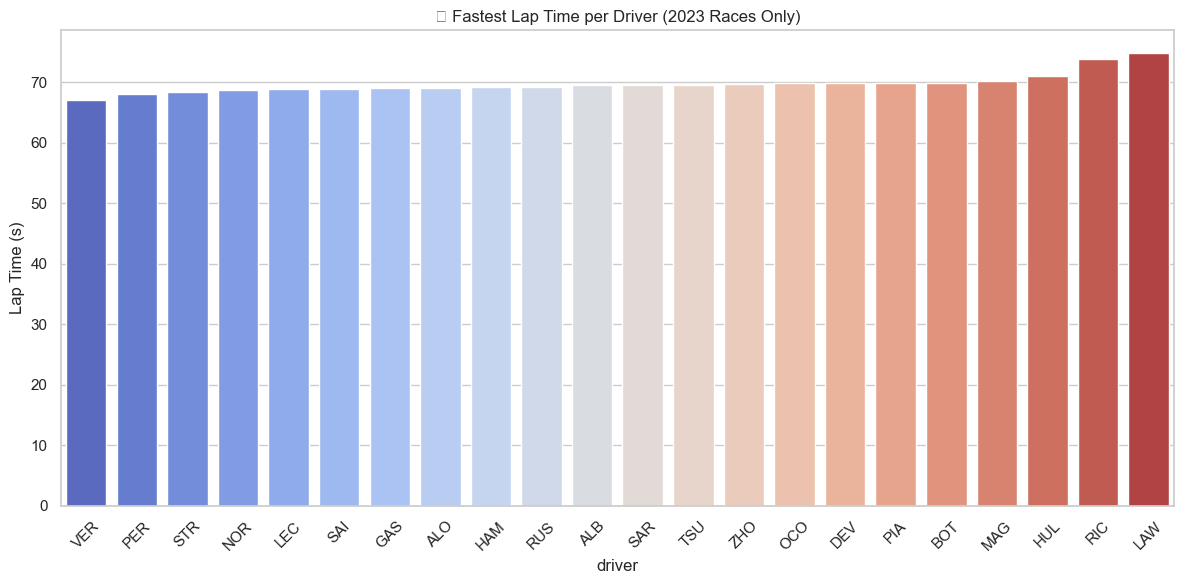

C:\Users\shrey\AppData\Local\Temp\ipykernel_56408\3080475535.py:51: UserWarning: Glyph 9201 (\N{STOPWATCH}) missing from current font.
  plt.tight_layout()
C:\Users\shrey\AppData\Local\Temp\ipykernel_56408\3080475535.py:51: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from current font.
  plt.tight_layout()
C:\Users\shrey\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 9201 (\N{STOPWATCH}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\shrey\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


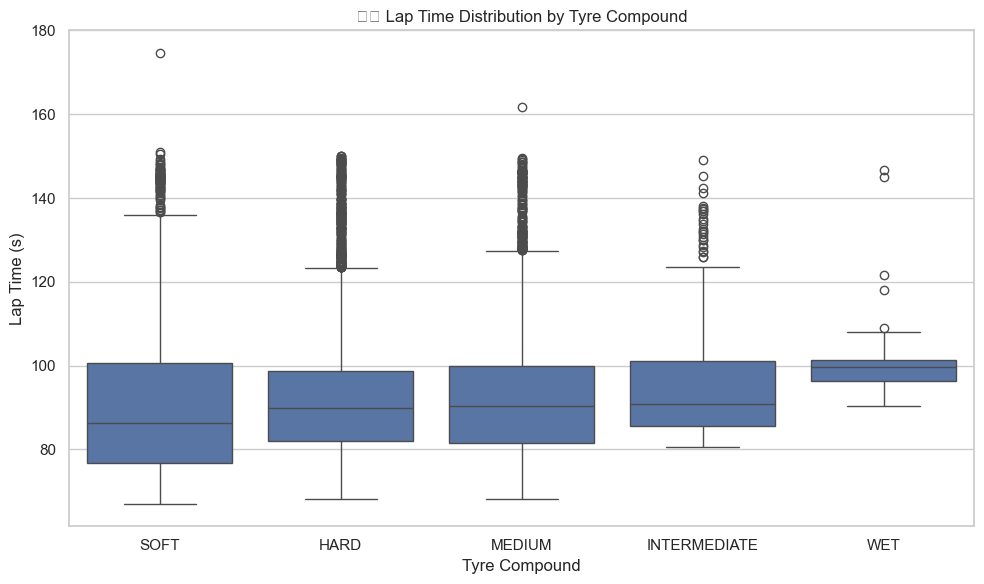

C:\Users\shrey\AppData\Local\Temp\ipykernel_56408\3080475535.py:66: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from current font.
  plt.tight_layout()
C:\Users\shrey\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


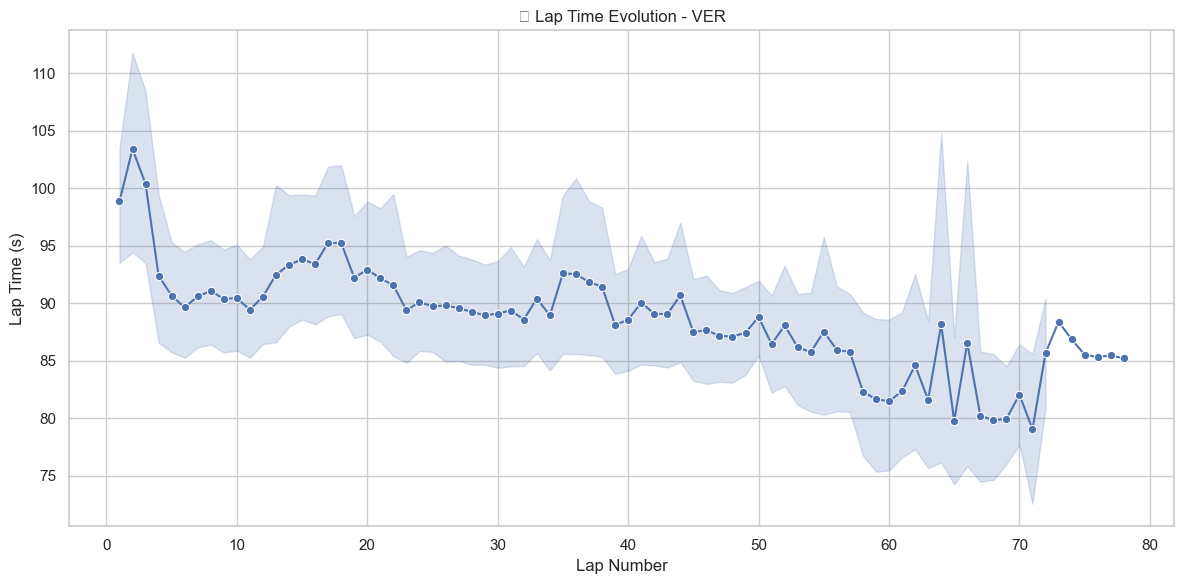

C:\Users\shrey\AppData\Local\Temp\ipykernel_56408\3080475535.py:78: UserWarning: Glyph 128640 (\N{ROCKET}) missing from current font.
  plt.tight_layout()


<Figure size 1000x600 with 0 Axes>

C:\Users\shrey\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128640 (\N{ROCKET}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


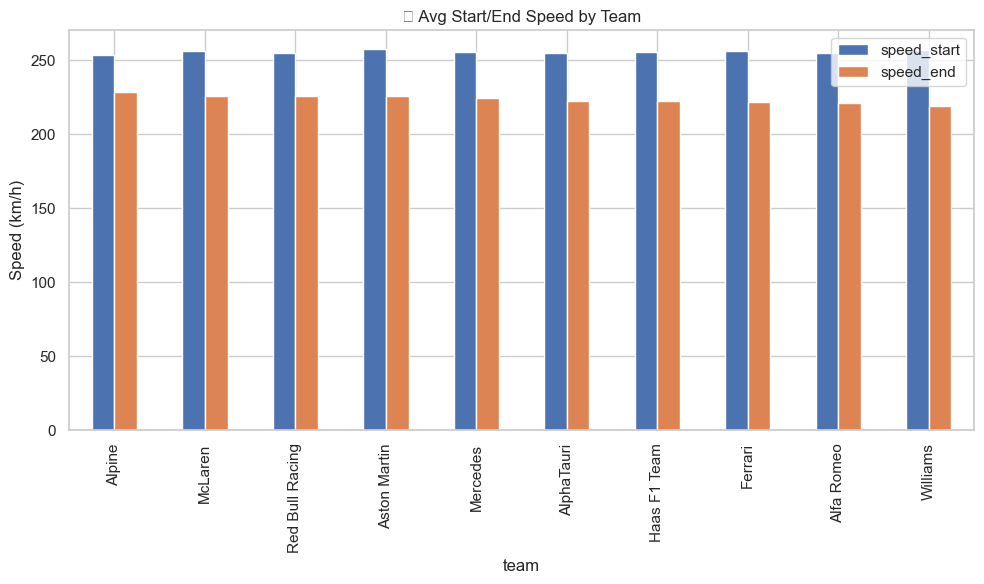

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set up
sns.set(style="whitegrid")
df = pd.read_csv("data/ml_2023_race_dataset.csv")

# Optional: replace 'na' with NaN for numeric analysis
df.replace("na", pd.NA, inplace=True)
numeric_cols = ['lap_time_seconds', 'sector_1_time', 'sector_2_time', 'sector_3_time',
                'speed_start', 'speed_end', 'throttle_avg', 'brake_avg', 'drs_count',
                'track_temp', 'air_temp']
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')

# ----------------------------
# 🔍 1. Basic Dataset Overview
# ----------------------------
print("\n📋 Basic Info:")
print(df.info())

print("\n🔢 Summary Stats:")
print(df.describe())

print("\n🧑‍✈️ Top Drivers by Lap Count:")
print(df['driver'].value_counts().head(10))

# -------------------------------
# 🕐 2. Fastest Lap per Driver
# -------------------------------
fastest_laps = df.groupby("driver")["lap_time_seconds"].min().sort_values()
print("\n🏁 Fastest Laps per Driver:")
print(fastest_laps.head(10))

plt.figure(figsize=(12,6))
sns.barplot(x=fastest_laps.index, y=fastest_laps.values, palette="coolwarm")
plt.title("🏁 Fastest Lap Time per Driver (2023 Races Only)")
plt.ylabel("Lap Time (s)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# -----------------------------------
# 🛞 3. Lap Time Distribution by Tyre
# -----------------------------------
plt.figure(figsize=(10,6))
sns.boxplot(x="compound", y="lap_time_seconds", data=df)
plt.title("⏱️ Lap Time Distribution by Tyre Compound")
plt.ylabel("Lap Time (s)")
plt.xlabel("Tyre Compound")
plt.tight_layout()
plt.show()

# ---------------------------------
# 📈 4. Lap Time Evolution Example
# ---------------------------------
example_driver = "VER"  # Change to any 3-letter code
driver_laps = df[df["driver"] == example_driver]

plt.figure(figsize=(12,6))
sns.lineplot(x="lap_number", y="lap_time_seconds", data=driver_laps, marker="o")
plt.title(f"📉 Lap Time Evolution - {example_driver}")
plt.ylabel("Lap Time (s)")
plt.xlabel("Lap Number")
plt.grid(True)
plt.tight_layout()
plt.show()

# ------------------------------------
# 🔥 5. Top Speed Trends by Team
# ------------------------------------
team_speed = df.groupby("team")[["speed_start", "speed_end"]].mean().sort_values("speed_end", ascending=False)

plt.figure(figsize=(10,6))
team_speed.plot(kind="bar", figsize=(10,6), title="🚀 Avg Start/End Speed by Team")
plt.ylabel("Speed (km/h)")
plt.grid(True)
plt.tight_layout()
plt.show()


In [5]:
import pandas as pd

# Load and clean data
df = pd.read_csv("data/2023_race_dataset.csv")
df.replace("na", pd.NA, inplace=True)

# ----------------------------
# 🔍 1. Null Count Per Column
# ----------------------------
na_counts = df.isna().sum().sort_values(ascending=False)
total_rows = len(df)
print("📊 Missing Values Summary:")
print(na_counts.apply(lambda x: f"{x} ({x/total_rows:.1%})"))

# ----------------------------
# 📈 2. Column Type Grouping
# ----------------------------
meta_cols = ['season', 'gp_name', 'driver', 'team', 'lap_number']
target_cols = ['lap_time_seconds']
telemetry_cols = ['speed_start', 'speed_end', 'throttle_avg', 'brake_avg', 'drs_count']
tyre_cols = ['compound', 'stint']
sector_cols = ['sector_1_time', 'sector_2_time', 'sector_3_time']
track_cols = ['track_status', 'track_temp', 'air_temp']
binary_cols = ['is_pit_lap']

# ----------------------------
# ✅ 3. Recommend X / y
# ----------------------------
X_candidate_cols = telemetry_cols + tyre_cols + sector_cols + track_cols + binary_cols
X_complete = [col for col in X_candidate_cols if df[col].notna().mean() > 0.75]
X_partial = [col for col in X_candidate_cols if 0.25 < df[col].notna().mean() <= 0.75]
X_sparse = [col for col in X_candidate_cols if df[col].notna().mean() <= 0.25]

print("\n✅ Recommended Feature Columns (X):")
print("High-completeness X:", X_complete)
print("Partial X (use with caution or imputation):", X_partial)
print("Sparse X (likely drop):", X_sparse)

# ----------------------------
# 🎯 4. Recommended Targets (y)
# ----------------------------
print("\n🎯 Possible ML Targets (Y):")
for y in target_cols:
    missing_rate = df[y].isna().mean()
    print(f"- {y} (missing: {missing_rate:.1%})")

# ----------------------------
# 🚫 5. Not to include in X
# ----------------------------
print("\n🚫 Metadata / Not Useful as Input Features:")
print(meta_cols + target_cols)


📊 Missing Values Summary:
sector_1_time       430 (1.8%)
gp_name               0 (0.0%)
track_temp            0 (0.0%)
drs_count             0 (0.0%)
brake_avg             0 (0.0%)
throttle_avg          0 (0.0%)
speed_end             0 (0.0%)
speed_start           0 (0.0%)
sector_3_time         0 (0.0%)
sector_2_time         0 (0.0%)
season                0 (0.0%)
lap_time_seconds      0 (0.0%)
is_pit_lap            0 (0.0%)
track_status          0 (0.0%)
stint                 0 (0.0%)
compound              0 (0.0%)
lap_number            0 (0.0%)
team                  0 (0.0%)
driver                0 (0.0%)
air_temp              0 (0.0%)
dtype: object

✅ Recommended Feature Columns (X):
High-completeness X: ['speed_start', 'speed_end', 'throttle_avg', 'brake_avg', 'drs_count', 'compound', 'stint', 'sector_1_time', 'sector_2_time', 'sector_3_time', 'track_status', 'track_temp', 'air_temp', 'is_pit_lap']
Partial X (use with caution or imputation): []
Sparse X (likely drop): []

🎯 Possibl

In [6]:
import pandas as pd
import fastf1
from tqdm import tqdm

fastf1.Cache.enable_cache(r"C:\Users\shrey\Desktop\projects\f1\visualize_f1\cache")

CSV_PATH = "data/ml_2023_race_dataset.csv"
OUTPUT_PATH = "data/2023_race_dataset.csv"

df = pd.read_csv(CSV_PATH)
df.replace("na", pd.NA, inplace=True)

# Prepare lookup
weather_lookup = {}
weather_cols = ['air_temp', 'track_temp', 'humidity', 'wind_speed', 'wind_dir', 'pressure']

# Get all unique (season, gp_name)
unique_sessions = df[['season', 'gp_name']].drop_duplicates()

for _, row in tqdm(unique_sessions.iterrows(), total=len(unique_sessions), desc="🌦️ Fetching Weather"):
    season = row['season']
    gp_name = row['gp_name']

    try:
        event = fastf1.get_event(season, gp_name)
        session = event.get_session("R")
        session.load()
        weather = session.weather_data

        if weather is not None:
            weather_avg = {
                'air_temp': weather['AirTemp'].mean() if 'AirTemp' in weather else "na",
                'track_temp': weather['TrackTemp'].mean() if 'TrackTemp' in weather else "na",
                'humidity': weather['Humidity'].mean() if 'Humidity' in weather else "na",
                'wind_speed': weather['WindSpeed'].mean() if 'WindSpeed' in weather else "na",
                'wind_dir': weather['WindDirection'].mean() if 'WindDirection' in weather else "na",
                'pressure': weather['Pressure'].mean() if 'Pressure' in weather else "na"
            }
        else:
            weather_avg = dict.fromkeys(weather_cols, "na")

        weather_lookup[(season, gp_name)] = weather_avg

    except Exception as e:
        print(f"❌ {season} {gp_name}: {e}")
        weather_lookup[(season, gp_name)] = dict.fromkeys(weather_cols, "na")

# Add weather to each lap row
for col in weather_cols:
    df[col] = df.apply(lambda row: weather_lookup.get((row['season'], row['gp_name']), {}).get(col, "na"), axis=1)

# Save updated dataset
df.to_csv(OUTPUT_PATH, index=False)
print(f"\n✅ Saved updated dataset with weather stats to: {OUTPUT_PATH}")


🌦️ Fetching Weather:   0%|          | 0/22 [00:00<?, ?it/s]core           INFO 	Loading data for Bahrain Grand Prix - Race [v3.5.3]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '11', '14', '55', '44', '18', '63', '77', '10', '23', '22', '2', '20', '21', '27', '24', '4', '31', '16', '81']
🌦️


✅ Saved updated dataset with weather stats to: data/2023_race_dataset.csv
